In [1]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\sunse\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."
...,...,...
785736,Software Engineer,"[bash, python, perl, linux, unix, kubernetes, ..."
785737,Data Analyst,"[sas, sas, sql, excel]"
785738,Business Analyst,"[powerpoint, excel]"
785739,Data Engineer,"[python, go, nosql, sql, mongo, shell, mysql, ..."


In [4]:
df_exploded = df.explode('job_skills')

<Axes: xlabel='job_skills'>

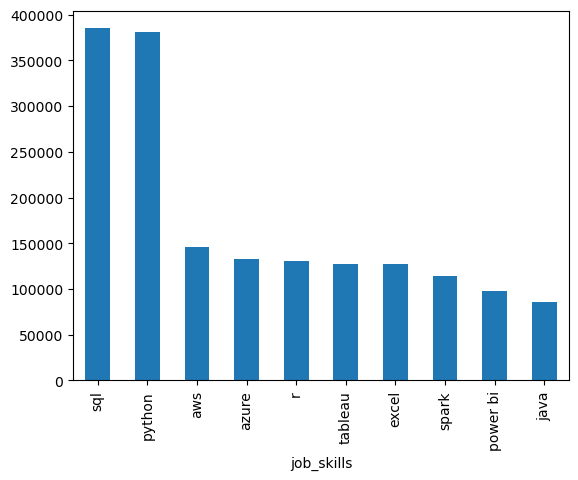

In [7]:
df_exploded['job_skills'].value_counts().head(10).plot(kind="bar")

In [9]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [13]:
df_skills_count = skills_count.reset_index(name='skill_count')

In [14]:
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [17]:
df_skills_count = df_skills_count.sort_values('skill_count',ascending=False)

In [18]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
2183,Software Engineer,rocketchat,1
24,Business Analyst,chainer,1
1157,Machine Learning Engineer,asp.net core,1
29,Business Analyst,codecommit,1


In [41]:
job_title = 'Data Engineer'
top_skills = 8
df_skills_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)

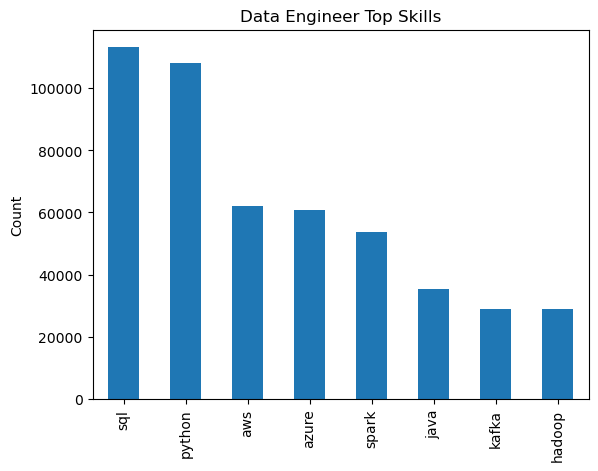

In [42]:
df_skills_final.plot(kind='bar',x='job_skills')
plt.title(job_title+' Top Skills')
plt.xlabel('')
plt.ylabel('Count')
plt.legend().set_visible(False)